In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:

import importlib
import add_relative_prices2
import get_oip_1p
importlib.reload(add_relative_prices2)
importlib.reload(get_oip_1p)

<module 'get_oip_1p' from 'c:\\Users\\John DeForest\\Desktop\\stonx\\get_oip_1p.py'>

In [105]:
# dr2
from get_oip_1p import get_oip_1p
from add_prices_to_oip import add_prices_to_oip
from remove_failed_tickers import remove_failed_tickers
from add_relative_prices2 import add_prices_to_oip_precise
from add_return_columns import add_return_columns
from train_rf_forward_return_model import train_rf_forward_return_model
from plot_predicted_vs_actual import plot_predicted_vs_actual
from run_rf_model_for_all_forward_returns import run_rf_model_for_all_forward_returns
import pandas as pd
import time
from single_positrader import single_positrader
from simulate_all_tickers import simulate_all_tickers
import matplotlib.pyplot as plt

import filter_functions

In [106]:
#5/01/22 - 23 (same as dr1)
oiurl = 'http://openinsider.com/screener?s=&o=&pl=&ph=&ll=&lh=&fd=-1&fdr=05%2F01%2F2022+-+05%2F01%2F2023&td=0&tdr=&fdlyl=&fdlyh=&daysago=&xp=1&vl=&vh=&ocl=&och=&sic1=-1&sicl=100&sich=9999&grp=0&nfl=&nfh=&nil=&nih=&nol=&noh=&v2l=&v2h=&oc2l=&oc2h=&sortcol=0&cnt=1000&page=1'

oip = get_oip_1p(oiurl)


print(oip.head())
print('number of rows:', len(oip))
tickers = oip["ticker"].unique().tolist()
print(oip.columns)

['x', 'filing date', 'trade date', 'ticker', 'company name', 'insider name', 'title', 'trade type', 'price', 'qty', 'owned', 'deltaown', 'value', '1d', '1w', '1m', '6m']
     x         filing_date trade_date ticker  \
0    D 2023-05-01 21:31:53 2023-04-28   USGO   
1    D 2023-05-01 20:33:46 2023-05-01   BANC   
2  NaN 2023-05-01 19:51:48 2023-05-01     PI   
3   DM 2023-05-01 19:29:20 2023-04-26   FOMC   
4  NaN 2023-05-01 19:08:00 2023-04-27   KREF   

                         company_name          insider_name          title  \
0                U.S. Goldmining Inc.  Bukacheva Aleksandra            Dir   
1            Banc of California, Inc.         Wolff Jared M      Pres, CEO   
2                          Impinj Inc          Sanghi Steve            Dir   
3                Fomo Worldwide, Inc.       Grover Vikram P  CEO, Dir, 10%   
4  Kkr Real Estate Finance Trust Inc.       Salem Matthew A            CEO   

     trade_type      qty    owned      value  1d  1w  1m  6m  insider_pr

In [107]:
window = [1,2,3,4,5,6,7,8,9,10,15,20,35,60,90,130,180,245]
oip_w_prices, error_dict = add_prices_to_oip_precise(oip, fwindow=window, bwindow=window)
with pd.option_context('display.max_columns', None):
    #print(df.head())
    print(oip_w_prices.head(3))
print(error_dict)

1 Failed download:
['FOMC']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['CSTR']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['SMMF']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['HMNF']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['CVCY']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['BECN']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['SCWX']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['BCOV']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['AHNR']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['AULT']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['HHC']: YFTzMissingError('possibly 

     x filing_date trade_date ticker              company_name  \
0    D  2023-05-01 2023-04-28   USGO      U.S. Goldmining Inc.   
1    D  2023-05-01 2023-05-01   BANC  Banc of California, Inc.   
2  NaN  2023-05-01 2023-05-01     PI                Impinj Inc   

           insider_name      title    trade_type    qty   owned      value  \
0  Bukacheva Aleksandra        Dir  P - Purchase   1000    1000     9150.0   
1         Wolff Jared M  Pres, CEO  P - Purchase   6769  273252    75118.0   
2          Sanghi Steve        Dir  P - Purchase  23500   42231  1997500.0   

   1d  1w  1m  6m  insider_price  d_own_plus%_isnew  d_own_plus%  mebuydate  \
0 NaN NaN NaN NaN           9.15                  1        999.0 2023-05-02   
1 NaN NaN NaN NaN          11.10                  0          3.0 2023-05-02   
2 NaN NaN NaN NaN          85.00                  0        125.0 2023-05-02   

     p_p1_td   v_p1_td    p_p2_td   v_p2_td    p_p3_td   v_p3_td    p_p4_td  \
0       9.76   29200.0    

In [111]:
len(error_dict)

89

In [ ]:
#SOMWHERE HERE NEED TO RUN CODE TO 

#1) export error_dict as failed tickers dict to xl for manual check?
#2) manual url retrieval? or llm based agent search to get correct investing.com urls
#3) run script to get all investing.com data for all missing (from yahoofinance) (but valid) stocks
#4) run script to pull from those many downloaded csvs to a df
#5) run an EQUIVALENT BUT MODIFIED add_prices_to_oip_precise for these new data, 
    #5b) merge this df with the main stock df

#6) run filtering algo(s) - zero vol, zero price, ADDV, min vol, min $ flow etc
#7) run some viz to look at included vs excluded stocks
#7.5) add returns computation
#7.6) add trade-to-file or trade-to-mebuy delay to df (feature)
#7.7) add trade-to-mebuy price change to df (feature)

#8) fit model - RF? some other time-series vecto autoreg? dynamic hold dur pred? return trade +%^ confidence? <-useful?
    #8a) tune model? ver vs val/train-test loss viz?
    #8b) R^2, F1, recall/precision metric sorting
    #8c) model selection
#9) pull out-of-training set OI data
    #9b) format like training data dfs
#10) pass into model, predict returns

#11) simulate trading strategy
    #skip negative predicted returns (duh)
    #skip small pos pred returns? ie threshold if pred to return less than 1% over the pred ideal hold duration
    #incl ADDV restriction - ie: give maximum trade size - cant go over say 1% (or .5%) of avg daily $ vol
    #dynamic buy based on +^% confidence (if part of model)
    #add buy/hold checkins to RF/conditional model - 
        #if after 1 day of hold it goes down x%, how likely to still finish in the green?

In [150]:
#6: run filtering algo(s) - ADDV, min vol, min $ flow etc
from filter_functions import *
lookbackcutoff = 95 #scan past 95 trading days for illiquidity
filterwindow=[x for x in window if x<lookbackcutoff]
#ONLY LOOK BACK (not fair to look forward...)
price_cols =  [f'p_m{n}_td' for n in filterwindow] #[f'p_p{n}_td' for n in window] +
vol_cols   =  [f'v_m{n}_td' for n in filterwindow] #[f'v_p{n}_td' for n in window] +

min_ADDV = 10000
#filter out really dead stocks 
# that move less than ^$10000 /day - cant trade more than $100 w/o >1% moving the market...
#TODO: test sensitivity - am i wiping out too many? leaving in too many illiquid bads?

oip_w_prices, addv_cols = add_addv_columns(oip_w_prices, price_prefix='p_m', vol_prefix='v_m')
oip_liquid, oip_excluded, oip_flagged = liquidity_filter_first_failure(
    oip_w_prices, addv_cols, vol_cols, price_cols,
    min_addv=min_ADDV, min_volume=100, min_price=1.0, last_n=5
)


print(f"Kept {len(oip_liquid)} out of {len(oip_w_prices)} trades after filtering for liquidity.")



--- Liquidity filter exclusion summary (first failure wins[0vol/0p/lovol/lop/loaddv], last_n = 5) ---
zero_volume : 253 rows (25.3%)
low_addv    : 54 rows (5.4%)
low_price   : 45 rows (4.5%)
low_vol     : 16 rows (1.6%)

Kept 632 / 1000 rows (63.2%) after filtering.
Kept 632 out of 1000 trades after filtering for liquidity.


In [146]:
#checking zero volume stuffs:
# Find all excluded rows where the flag was "zero_volume"
zero_vol_rows = oip_excluded[oip_excluded['liquidity_flag'] == 'zero_volume']

print(f"Zero volume excluded rows: {len(zero_vol_rows)}")
print(zero_vol_rows.head())


Zero volume excluded rows: 267
      x filing_date trade_date ticker                      company_name  \
0     D  2023-05-01 2023-04-28   USGO              U.S. Goldmining Inc.   
3    DM  2023-05-01 2023-04-26   FOMC              Fomo Worldwide, Inc.   
13  NaN  2023-05-01 2023-05-01   CSTR  Capstar Financial Holdings, Inc.   
14  NaN  2023-05-01 2023-05-01   CATC                 Cambridge Bancorp   
19    D  2023-05-01 2023-05-01   SMMF      Summit Financial Group, Inc.   

              insider_name                    title    trade_type      qty  \
0     Bukacheva Aleksandra                      Dir  P - Purchase     1000   
3          Grover Vikram P            CEO, Dir, 10%  P - Purchase  5548815   
13    Delay William Tilden                      Dir  P - Purchase     5000   
14  Lord Hambleton Douglas                      Dir  P - Purchase     1000   
19            Hager Joseph  EVP, Chief Risk Officer  P - Purchase     3000   

      owned  ...     addv_m3_td     addv_m4_td   

In [147]:
# Find all volume columns (assuming prefix 'v_m')
vol_cols = [col for col in oip_w_prices.columns if col.startswith('v_m')]

for idx, row in zero_vol_rows.head(5).iterrows():
    zero_vol_fields = [col for col in vol_cols if row[col] == 0 or pd.isnull(row[col])]
    print(f"\nRow index {idx} ticker {row['ticker']}, trade_date {row['trade_date']}:")
    print(f"Zero-volume cols: {zero_vol_fields}")
    print(row[vol_cols])  # Show all volumes for this row



Row index 0 ticker USGO, trade_date 2023-04-28 00:00:00:
Zero-volume cols: ['v_m9_td', 'v_m10_td', 'v_m15_td', 'v_m20_td', 'v_m35_td', 'v_m60_td', 'v_m90_td', 'v_m130_td', 'v_m180_td', 'v_m245_td']
v_m1_td       76800.0
v_m2_td       58100.0
v_m3_td       51300.0
v_m4_td       62900.0
v_m5_td      102000.0
v_m6_td      135300.0
v_m7_td      516000.0
v_m8_td      231900.0
v_m9_td          None
v_m10_td         None
v_m15_td         None
v_m20_td         None
v_m35_td         None
v_m60_td         None
v_m90_td         None
v_m130_td        None
v_m180_td        None
v_m245_td        None
Name: 0, dtype: object

Row index 3 ticker FOMC, trade_date 2023-04-26 00:00:00:
Zero-volume cols: ['v_m1_td', 'v_m2_td', 'v_m3_td', 'v_m4_td', 'v_m5_td', 'v_m6_td', 'v_m7_td', 'v_m8_td', 'v_m9_td', 'v_m10_td', 'v_m15_td', 'v_m20_td', 'v_m35_td', 'v_m60_td', 'v_m90_td', 'v_m130_td', 'v_m180_td', 'v_m245_td']
v_m1_td      None
v_m2_td      None
v_m3_td      None
v_m4_td      None
v_m5_td      None
v_m6_

In [115]:
#7.5) add returns computation (both for fwd and back windows) relative to mebuy price
    #add each as a new column - ie: r_m{n}_td for minus n trading days and r_p{n}
#7.6) add trade-to-mebuy delay in #days to df (feature - new column)
#7.7) add trade-to-mebuy price change to df (feature - new column)
    # relative price change-ie%? or absolute? maybe rel. 
    # ie: if goes up in the period between insider trade and me realistically buying, count as +x% of @insider purchase date price
#current working df: oip_liquid
from add_return_columns import add_return_columns
from trade_delay_fns import * 
import yfinance as yf

oip_liquid = add_return_columns(oip_liquid)

# 7.6 - Add trade-to-mebuy delay in days
oip_liquid = add_trade_to_mebuy_delay(oip_liquid, trade_date_col='trade_date', mebuy_date_col='mebuydate')

#7.7a: get price at the insider buy date - newcol: 'closeprice_at_insiderbuy'
oip_liquid = add_closeprice_at_insiderbuy(oip_liquid, mebuydate_col='mebuydate', trade_to_mebuy_days_col='trade_to_mebuy_days')

# 7.7 - Add trade-to-mebuy price change (relative)
oip_liquid = add_trade_to_mebuy_price_change(
    oip_liquid, 
    trade_price_col='closeprice_at_insiderbuy', 
    mebuy_price_col='mebuy_price'
)


<string>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
<string>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
<string>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
<string>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
<string>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
<string>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
<string>:16: FutureWarning: Calling float on a single element Se

In [116]:
with pd.option_context('display.max_columns', None):
    #print(df.head())
    print(oip_liquid.head(3))

     x filing_date trade_date ticker                        company_name  \
1    D  2023-05-01 2023-05-01   BANC            Banc of California, Inc.   
2  NaN  2023-05-01 2023-05-01     PI                          Impinj Inc   
4  NaN  2023-05-01 2023-04-27   KREF  Kkr Real Estate Finance Trust Inc.   

      insider_name      title    trade_type    qty   owned      value  1d  1w  \
1    Wolff Jared M  Pres, CEO  P - Purchase   6769  273252    75118.0 NaN NaN   
2     Sanghi Steve        Dir  P - Purchase  23500   42231  1997500.0 NaN NaN   
4  Salem Matthew A        CEO  P - Purchase  25000  386817   267563.0 NaN NaN   

   1m  6m  insider_price  d_own_plus%_isnew  d_own_plus%  mebuydate  \
1 NaN NaN           11.1                  0          3.0 2023-05-02   
2 NaN NaN           85.0                  0        125.0 2023-05-02   
4 NaN NaN           10.7                  0          7.0 2023-05-02   

     p_p1_td   v_p1_td    p_p2_td   v_p2_td    p_p3_td   v_p3_td    p_p4_td  \
1  10.

       x filing_date trade_date ticker                 company_name  \
543  NaN  2023-04-07 2023-04-06   OLMA  Olema Pharmaceuticals, Inc.   

                     insider_name                           title  \
543  Kovacs Shane William Charles  CH. OPERATING, FINANCIAL Offic   

       trade_type    qty   owned  value  1d  1w  1m  6m  insider_price  \
543  P - Purchase  10000  396197    0.0 NaN NaN NaN NaN            0.0   

     d_own_plus%_isnew  d_own_plus%  mebuydate p_p1_td   v_p1_td p_p2_td  \
543                  0          3.0 2023-04-10     3.3  131700.0    3.52   

      v_p2_td p_p3_td   v_p3_td p_p4_td  v_p4_td p_p5_td   v_p5_td p_p6_td  \
543  322500.0    3.79  566600.0    3.66  85300.0     3.7  118600.0     3.7   

      v_p6_td p_p7_td   v_p7_td p_p8_td  v_p8_td p_p9_td   v_p9_td p_p10_td  \
543  273000.0     4.0  124200.0    4.12  67600.0    4.15  100400.0     4.04   

    v_p10_td p_p15_td  v_p15_td p_p20_td  v_p20_td p_p35_td  v_p35_td  \
543  24500.0     5.43  2968

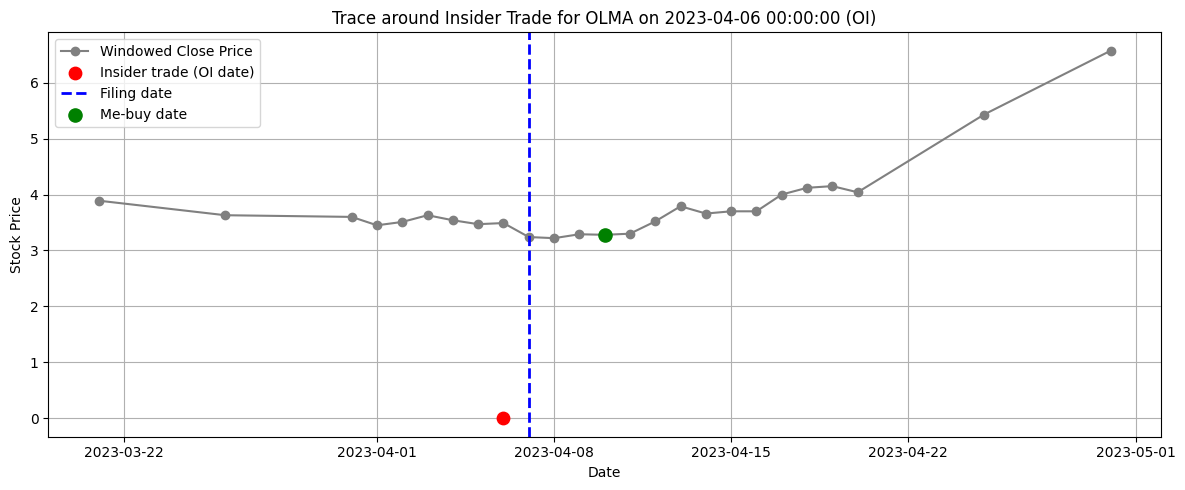

In [117]:
#side: finding weird insider_price outlier (0$??)
import pandas as pd
import matplotlib.pyplot as plt

# Find rows where trade_price is zero or NaN
zero_trade_price_rows = oip_liquid[(oip_liquid['insider_price'] == 0) | (oip_liquid['insider_price'].isna())]
# Print all columns for these rows
with pd.option_context('display.max_columns', None):
    print(zero_trade_price_rows)

def plot_trade_price_trace(row, fwindow, bwindow):
    mebuy_price = float(row['mebuy_price'])
    mebuy_date = pd.to_datetime(row['mebuydate'])

    lookback_days = sorted(bwindow)
    lookback_prices = [float(row[f'p_m{n}_td']) if pd.notnull(row[f'p_m{n}_td']) else None for n in lookback_days]
    lookback_dates = [mebuy_date - pd.Timedelta(days=n) for n in lookback_days]

    lookfwd_days = sorted(fwindow)
    lookfwd_prices = [float(row[f'p_p{n}_td']) if pd.notnull(row[f'p_p{n}_td']) else None for n in lookfwd_days]
    lookfwd_dates = [mebuy_date + pd.Timedelta(days=n) for n in lookfwd_days]

    all_dates = lookback_dates[::-1] + [mebuy_date] + lookfwd_dates
    all_prices = lookback_prices[::-1] + [mebuy_price] + lookfwd_prices

    plt.figure(figsize=(12,5))
    plt.plot(all_dates, all_prices, '-o', label='Windowed Close Price', color='gray')

    # Red dot: Insider trade
    trade_date = pd.to_datetime(row['trade_date'])
    trade_price = float(row['insider_price'])
    plt.scatter([trade_date], [trade_price], color='red', label='Insider trade (OI date)', zorder=5, s=80)

    # Vertical line: Filing date
    filing_date = pd.to_datetime(row['filing_date'])
    plt.axvline(filing_date, color='blue', linestyle='--', label='Filing date', linewidth=2)

    # Green dot: mebuydate
    plt.scatter([mebuy_date], [mebuy_price], color='green', label='Me-buy date', zorder=6, s=90)

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f"Trace around Insider Trade for {row['ticker']} on {row['trade_date']} (OI)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage:
# plot_trade_price_trace(oip_liquid.loc[543], fwindow, bwindow)
fwindow = [1,2,3,4,5,6,7,8,9,10,15,20]
bwindow = fwindow
row = oip_liquid.loc[543]    # or: row = oip_liquid.iloc[0] for first row

plot_trade_price_trace(row, fwindow, bwindow)

In [118]:
#8 model testing
# Example: Use only recent returns and key insider info
lookback_windows = window  # adjust to your dataset
return_feats = [f"r_m{n}_td" for n in lookback_windows]
insider_feats = ['trade_to_mebuy_days','trade_to_mebuy_relpct','d_own_plus%_isnew', 'd_own_plus%', 'owned', 'qty', 'value']
all_features = return_feats + insider_feats
target_col = 'r_p5_td'  # fixed hold window

In [127]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Drop all rows with any NA in features or target
df = oip_liquid.dropna(subset=[target_col] + all_features).copy()
print(f"Rows before dropna: {len(oip_liquid)}")
print(f"Rows after dropna:  {len(df)}")
print(f"Rows dropped:       {len(oip_liquid) - len(df)} ({(len(oip_liquid) - len(df))/len(oip_liquid):.2%})")

# Step 2: Force all features to numeric (optional, if needed)
cols_to_fix = [col for col in df.columns if col.startswith('r_m') or col == 'trade_to_mebuy_relpct']
df[cols_to_fix] = df[cols_to_fix].apply(pd.to_numeric, errors='coerce')

# (Optional) Print which columns have missing values in the *filtered* df (should all be 0 now)
missing_counts = df[[target_col] + all_features].isnull().sum()
print("\nMissing values by column (should all be 0):")
print(missing_counts.sort_values(ascending=False))

# Step 3: Train/test split (always use df, never oip_liquid)
X = df[all_features]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_class = (y_train > 0).astype(int)
y_test_class = (y_test > 0).astype(int)


Rows before dropna: 593
Rows after dropna:  593
Rows dropped:       0 (0.00%)

Missing values by column (should all be 0):
r_p5_td                  0
r_m1_td                  0
r_m2_td                  0
r_m3_td                  0
r_m4_td                  0
r_m5_td                  0
r_m6_td                  0
r_m7_td                  0
r_m8_td                  0
r_m9_td                  0
r_m10_td                 0
r_m15_td                 0
r_m20_td                 0
r_m35_td                 0
r_m60_td                 0
r_m90_td                 0
r_m130_td                0
r_m180_td                0
r_m245_td                0
trade_to_mebuy_days      0
trade_to_mebuy_relpct    0
d_own_plus%_isnew        0
d_own_plus%              0
owned                    0
qty                      0
value                    0
dtype: int64


Accuracy:   0.2773
Precision:  0.2773
Recall:     1.0000
F1 Score:   0.4342
ROC AUC:    0.6159
Confusion Matrix:
 [[ 0 86]
 [ 0 33]]


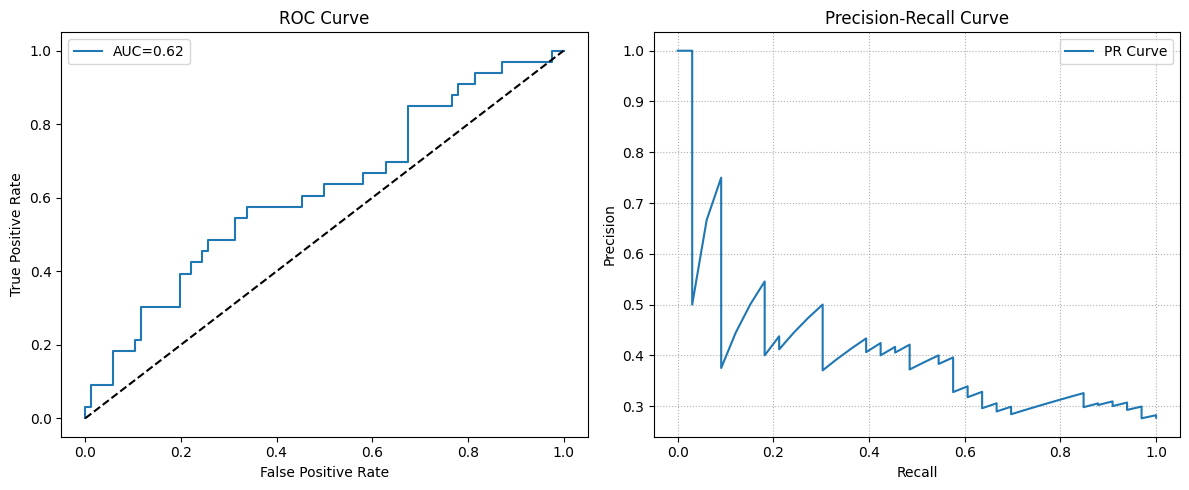

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,
    confusion_matrix, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt

# --- Fit a simple Logistic Regression ---
clf = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
clf.fit(X_train, y_train_class)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# --- Evaluation summary ---
precision = precision_score(y_test_class, y_pred)
recall = recall_score(y_test_class, y_pred)
f1 = f1_score(y_test_class, y_pred)
auc = roc_auc_score(y_test_class, y_proba)
acc = accuracy_score(y_test_class, y_pred)
conf = confusion_matrix(y_test_class, y_pred)

print(f"Accuracy:   {acc:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1 Score:   {f1:.4f}")
print(f"ROC AUC:    {auc:.4f}")
print("Confusion Matrix:\n", conf)

# --- Plot ROC and PR curve ---
fpr, tpr, _ = roc_curve(y_test_class, y_proba)
precisions, recalls, _ = precision_recall_curve(y_test_class, y_proba)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f" {target_col} ROC Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recalls, precisions, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f" {target_col} Precision-Recall Curve")
plt.grid(True, ls=':')
plt.legend()

plt.tight_layout()
plt.show()


RandomForestClassifier (n_estimators=22):
Accuracy:   0.7815
Precision:  0.8182
Recall:     0.2727
F1 Score:   0.4091
ROC AUC:    0.8298
Confusion Matrix:
 [[84  2]
 [24  9]]


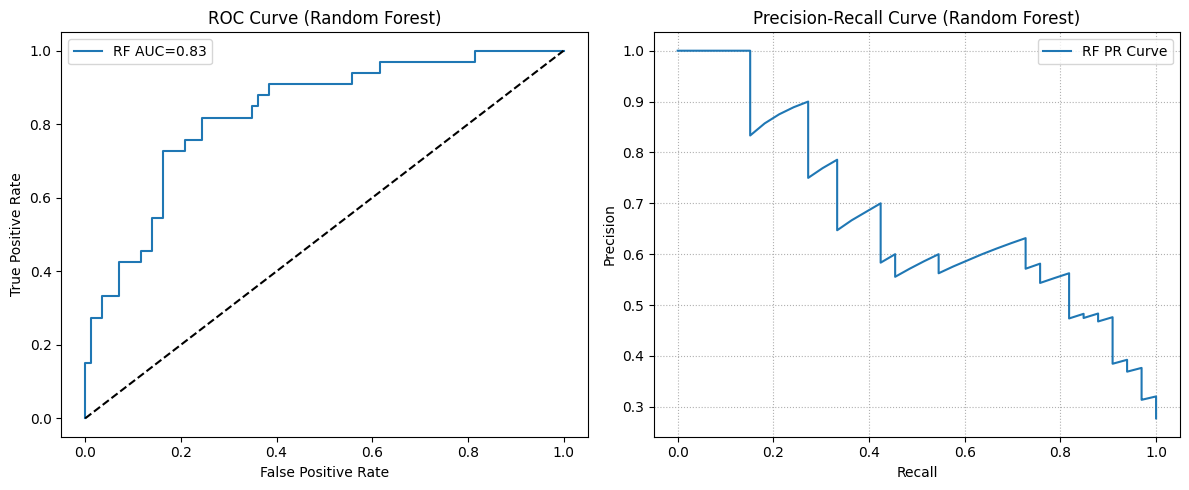

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,
    confusion_matrix, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt

nest =22 #see next block for optimization choice

# --- Fit a tiny Random Forest Classifier ---
rf_clf = RandomForestClassifier(n_estimators=nest, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train_class)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# --- Evaluation summary ---
precision_rf = precision_score(y_test_class, y_pred_rf)
recall_rf = recall_score(y_test_class, y_pred_rf)
f1_rf = f1_score(y_test_class, y_pred_rf)
auc_rf = roc_auc_score(y_test_class, y_proba_rf)
acc_rf = accuracy_score(y_test_class, y_pred_rf)
conf_rf = confusion_matrix(y_test_class, y_pred_rf)

print(f"RandomForestClassifier (n_estimators={nest}):")
print(f"Accuracy:   {acc_rf:.4f}")
print(f"Precision:  {precision_rf:.4f}")
print(f"Recall:     {recall_rf:.4f}")
print(f"F1 Score:   {f1_rf:.4f}")
print(f"ROC AUC:    {auc_rf:.4f}")
print("Confusion Matrix:\n", conf_rf)

# --- Plot ROC and PR curve ---
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_proba_rf)
precisions_rf, recalls_rf, _ = precision_recall_curve(y_test_class, y_proba_rf)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr_rf, tpr_rf, label=f"RF AUC={auc_rf:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve  {target_col}  (Random Forest)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recalls_rf, precisions_rf, label="RF PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve {target_col}  (Random Forest)")
plt.grid(True, ls=':')
plt.legend()

plt.tight_layout()
plt.show()


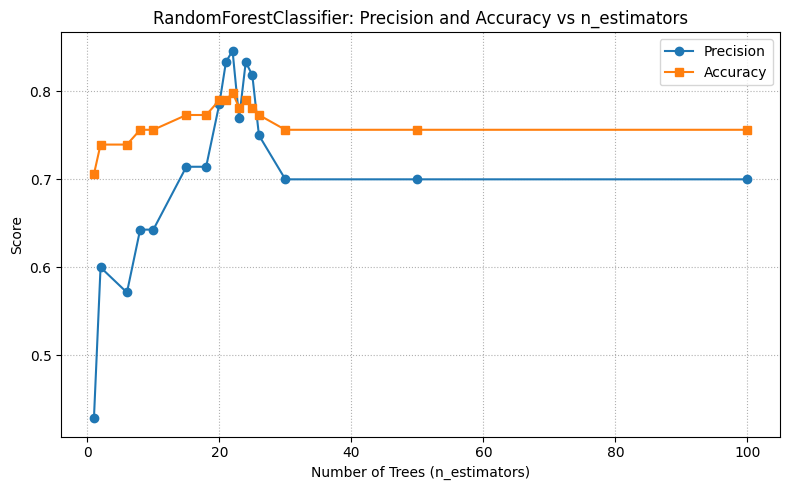

Max precision: 0.8462 at n_estimators=22
Max accuracy:  0.7983 at n_estimators=22


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score

# List of estimators to test
estimator_range = [1,2,6,8,10,15,18,20,21,22,23,24,25,26,30,50,100]
precisions = []
accuracies = []

for n in estimator_range:
    rf = RandomForestClassifier(n_estimators=n, max_depth=4, random_state=42)
    rf.fit(X_train, y_train_class)
    y_pred = rf.predict(X_test)
    precisions.append(precision_score(y_test_class, y_pred))
    accuracies.append(accuracy_score(y_test_class, y_pred))

# Plotting
plt.figure(figsize=(8,5))
plt.plot(estimator_range, precisions, marker='o', label="Precision")
plt.plot(estimator_range, accuracies, marker='s', label="Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Score")
plt.title(f"RandomForestClassifier: {target_col} Precision and Accuracy vs n_estimators")
plt.legend()
plt.grid(True, ls=':')
plt.tight_layout()
plt.show()

max_prec = max(precisions)
best_prec_idx = precisions.index(max_prec)
best_prec_n = estimator_range[best_prec_idx]

# Find max accuracy and its corresponding n_estimators
max_acc = max(accuracies)
best_acc_idx = accuracies.index(max_acc)
best_acc_n = estimator_range[best_acc_idx]

print(f"Max precision: {max_prec:.4f} at n_estimators={best_prec_n}")
print(f"Max accuracy:  {max_acc:.4f} at n_estimators={best_acc_n}")


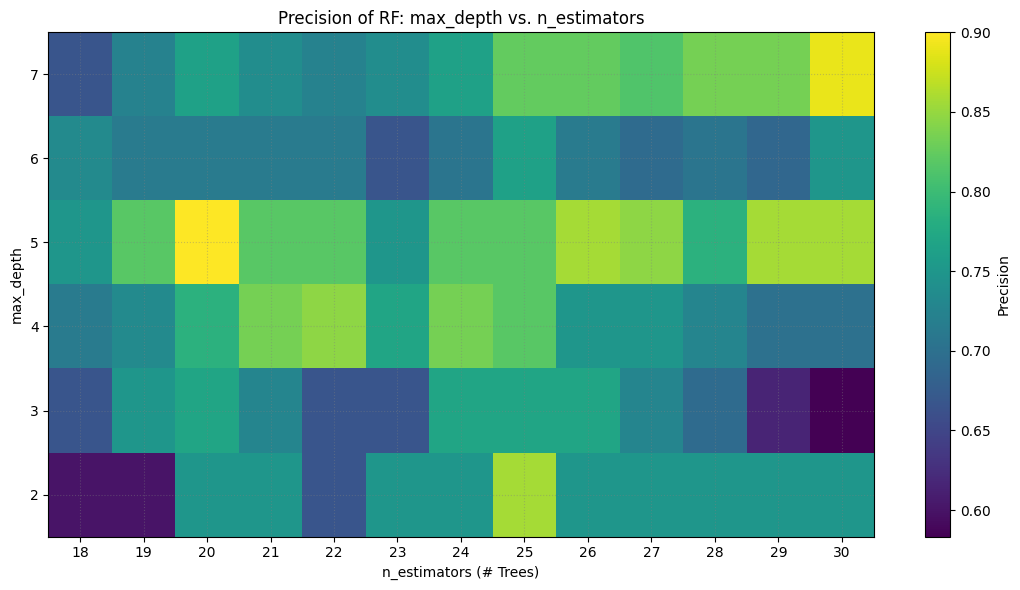

Best precision: 0.9000 at n_estimators=20, max_depth=5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
nest1 = [3,4,5,6,7,8,9,10,12,15,20,30,50,75,100]
nest2 = [18,19,20,21,22,23,24,25,26,27,28,29,30]
estimator_range = np.array(nest2)
max_depth_range = np.array([2,3,4,5,6,7])

precision_matrix = np.zeros((len(max_depth_range), len(estimator_range)))

for i, max_depth in enumerate(max_depth_range):
    for j, n_estimators in enumerate(estimator_range):
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train_class)
        y_pred = rf.predict(X_test)
        precision_matrix[i, j] = precision_score(y_test_class, y_pred)

# To get edges for pcolormesh, make an array of bin edges
def midpoints(arr):
    return (arr[:-1] + arr[1:]) / 2

# Extend bin edges on both ends
est_edges = np.concatenate(([estimator_range[0] - (midpoints(estimator_range)[0] - estimator_range[0])], 
                            midpoints(estimator_range), 
                            [estimator_range[-1] + (estimator_range[-1] - midpoints(estimator_range)[-1])]))
depth_edges = np.concatenate(([max_depth_range[0] - (midpoints(max_depth_range)[0] - max_depth_range[0])],
                              midpoints(max_depth_range), 
                              [max_depth_range[-1] + (max_depth_range[-1] - midpoints(max_depth_range)[-1])]))

plt.figure(figsize=(11,6))
c = plt.pcolormesh(est_edges, depth_edges, precision_matrix, cmap='viridis', shading='auto')
plt.colorbar(c, label="Precision")

plt.xlabel("n_estimators (# Trees)")
plt.ylabel("max_depth")
plt.title(f" {target_col} Precision of RF: max_depth vs. n_estimators")

# Place ticks at the center of each cell
plt.xticks(estimator_range)
plt.yticks(max_depth_range)
plt.grid(visible=True, which='both', color='gray', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

# Print the best combo and its value
best_idx = np.unravel_index(np.argmax(precision_matrix), precision_matrix.shape)
best_depth = max_depth_range[best_idx[0]]
best_n = estimator_range[best_idx[1]]
best_prec = precision_matrix[best_idx]
print(f"Best precision: {best_prec:.4f} at n_estimators={best_n}, max_depth={best_depth}")


In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, r2_score
)

# Refit the best model on train, predict/test
rf_best = RandomForestClassifier(n_estimators=best_n, max_depth=best_depth, random_state=42)
rf_best.fit(X_train, y_train_class)
y_pred_best = rf_best.predict(X_test)
y_proba_best = rf_best.predict_proba(X_test)[:, 1]

precision_best = precision_score(y_test_class, y_pred_best)
recall_best = recall_score(y_test_class, y_pred_best)
f1_best = f1_score(y_test_class, y_pred_best)
auc_best = roc_auc_score(y_test_class, y_proba_best)
acc_best = accuracy_score(y_test_class, y_pred_best)
conf_best = confusion_matrix(y_test_class, y_pred_best)

# If you want to evaluate R², you need to use regression and continuous y (otherwise not meaningful for classifier):
# If y_test is real-valued, and you have a regressor output, use:
# r2_best = r2_score(y_test, y_pred_reg)
# But for classifier, it's not typical. If you want R² for the class probabilities:
# r2_prob = r2_score(y_test_class, y_proba_best)  # Not standard but possible

print(f"\n--- {target_col}  Metrics for best RF (n_estimators={best_n}, max_depth={best_depth}) ---")
print(f"Accuracy:   {acc_best:.4f}")
print(f"Precision:  {precision_best:.4f}")
print(f"Recall:     {recall_best:.4f}")
print(f"F1 Score:   {f1_best:.4f}")
print(f"ROC AUC:    {auc_best:.4f}")
# print(f"R² (class prob vs. label): {r2_prob:.4f}")
print("Confusion Matrix:\n", conf_best)
print("[[TN, FP], \n [FN, TP]]")


--- Metrics for best RF (n_estimators=20, max_depth=5) ---
Accuracy:   0.7899
Precision:  0.9000
Recall:     0.2727
F1 Score:   0.4186
ROC AUC:    0.8171
Confusion Matrix:
 [[85  1]
 [24  9]]
[[TN, FP], 
 [FN, TP]]


C:\Users\John DeForest\AppData\Local\Temp\ipykernel_9584\2157907087.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x="Predicted Class", y="Actual Return", inner=None, palette="pastel", width=0.8)


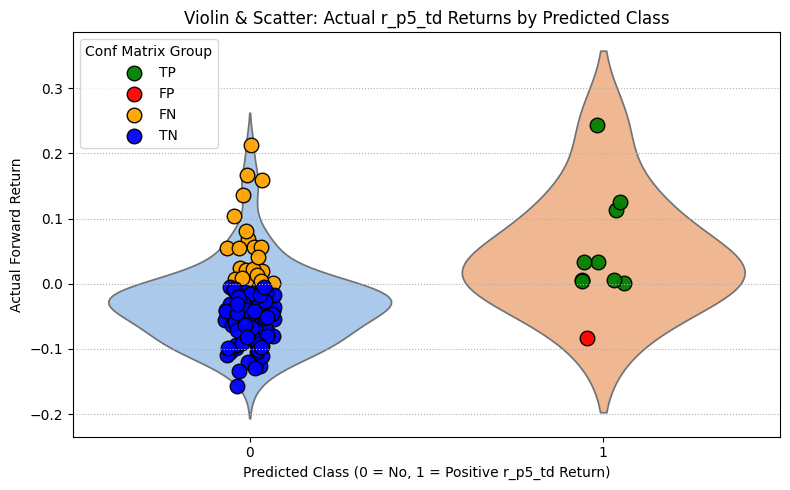

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set up data
x_vals = y_pred
y_vals = actual_returns.values if hasattr(actual_returns, 'values') else actual_returns
conf_colors = []
for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
        conf_colors.append('TP')
    elif yt == 1 and yp == 0:
        conf_colors.append('FN')
    elif yt == 0 and yp == 1:
        conf_colors.append('FP')
    else:
        conf_colors.append('TN')
color_map = {'TP': 'green', 'FP': 'red', 'FN': 'orange', 'TN': 'blue'}

# Create a DataFrame for plotting
import pandas as pd
df_plot = pd.DataFrame({
    'Predicted Class': x_vals,
    'Actual Return': y_vals,
    'ConfGroup': conf_colors
})

plt.figure(figsize=(8,5))
# Violin plot for distribution
sns.violinplot(data=df_plot, x="Predicted Class", y="Actual Return", inner=None, palette="pastel", width=0.8)

# Overlay scatter, jittered, larger dots, colored by confusion group
for group, color in color_map.items():
    subset = df_plot[df_plot['ConfGroup'] == group]
    # Add random jitter to x for better visibility, but keep close to center
    x_jitter = subset['Predicted Class'] + np.random.uniform(-0.07, 0.07, size=len(subset))
    plt.scatter(x_jitter, subset['Actual Return'], 
                color=color, s=110, edgecolor='k', alpha=0.95, label=group)

plt.xlabel(f"Predicted Class (0 = No, 1 = Positive {target_col} Return)")
plt.ylabel("Actual Forward Return")
plt.title(f"Violin & Scatter: Actual {target_col} Returns by Predicted Class")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Conf Matrix Group")
plt.xlim(-0.5, 1.5)
plt.grid(True, axis='y', ls=':')
plt.tight_layout()
plt.show()



In [ ]:
#end of simple RF model. need way more data to do more

In [66]:
# import xgboost as xgb
# reg = xgb.XGBRegressor(
#     n_estimators=300, max_depth=8, learning_rate=0.05,
#     subsample=0.8, colsample_bytree=0.8, random_state=42
# )
# reg.fit(X_train, y_train)
# y_pred = reg.predict(X_test)
#^basic train and fit

#hparam tuning:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 250, 500, 750, 1000],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.7, 1, 2, 5],
    'min_child_weight': [1, 2, 3, 4, 5, 7, 10],
    'reg_alpha': [0, 0.1, 0.5, 1, 2],
    'reg_lambda': [0.1, 0.5, 1, 1.5, 2],
}

rs = RandomizedSearchCV(
    xgb_clf, param_dist, 
    n_iter=50,  # Or 100+ for larger search
    scoring='precision',  # Optimize for precision!
    cv=5, 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)
rs.fit(X_train, y_train_class)
print("Best parameters:", rs.best_params_)
print("Best precision:", rs.best_score_)





Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [17:17:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 2, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': 0.02, 'gamma': 2, 'colsample_bytree': 1.0}
Best precision: 0.8083333333333332


In [67]:
#use best params:
best_clf = rs.best_estimator_
y_pred = best_clf.predict(X_test)
probs = best_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, r2_score

precision = precision_score(y_test_class, y_pred)
recall = recall_score(y_test_class, y_pred)
f1 = f1_score(y_test_class, y_pred)
auc = roc_auc_score(y_test_class, probs)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {auc:.4f}")


Precision: 0.5556
Recall:    0.3333
F1 Score:  0.4167
ROC AUC:   0.8042


C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [17:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [17:17:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [17:17:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [17:17:49] WARNING: C:\actions-runner\_w

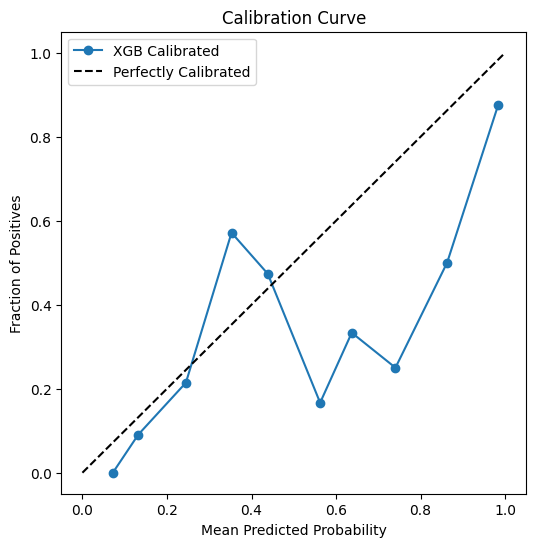

In [68]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt

cal_clf = CalibratedClassifierCV(best_clf, method='isotonic', cv=5)
cal_clf.fit(X_train, y_train_class)
cal_probs = cal_clf.predict_proba(X_test)[:, 1]

# Calibration curve plot
prob_true, prob_pred = calibration_curve(y_test_class, cal_probs, n_bins=10)
plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label='XGB Calibrated')
plt.plot([0,1], [0,1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


In [124]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precisions, recalls, thresholds = precision_recall_curve(y_test_class, cal_probs)

# Ignore the first point (which is for threshold < min(probs)), so use thresholds[best_idx-1] if best_idx > 0
best_idx = np.argmax(precisions[:-1])  # Use only valid indices
best_threshold = thresholds[best_idx]
print(f"Best precision at threshold {best_threshold:.2f}: {precisions[best_idx]:.4f}")

# Signal for trading:
final_preds = (cal_probs > best_threshold).astype(int)
for t, p, r in zip(thresholds, precisions[:-1], recalls[:-1]):
    print(f"Threshold: {t:.2f} | Precision: {p:.3f} | Recall: {r:.3f}")



ValueError: Found input variables with inconsistent numbers of samples: [119, 109]

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_class, cal_probs)
plt.figure(figsize=(6,4))
plt.plot(recalls[:-1], precisions[:-1], marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, ls=':')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [119, 109]

In [73]:
best_threshold = 0.93
final_preds = (cal_probs > best_threshold).astype(int)

# Evaluate with precision/recall/f1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_class, final_preds)
recall = recall_score(y_test_class, final_preds)
f1 = f1_score(y_test_class, final_preds)

print(f"Precision at threshold {best_threshold}: {precision:.4f}")
print(f"Recall at threshold {best_threshold}:    {recall:.4f}")
print(f"F1 at threshold {best_threshold}:        {f1:.4f}")

# You can also check how many positive predictions this makes
print(f"Number of positive predictions: {final_preds.sum()} of {len(final_preds)}")


Precision at threshold 0.93: 0.8750
Recall at threshold 0.93:    0.2333
F1 at threshold 0.93:        0.3684
Number of positive predictions: 8 of 109


In [ ]:
#end of hparam tuned model..

In [126]:
#base xgboost model no tuning fancy

from sklearn.metrics import r2_score, root_mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Predicted class: 1 if predicted return > 0, else 0
y_pred_class = (y_pred > 0).astype(int)
y_true_class = (y_test > 0).astype(int)

precision = precision_score(y_true_class, y_pred_class)
recall = recall_score(y_true_class, y_pred_class)
f1 = f1_score(y_true_class, y_pred_class)
print(f"Precision (Direction): {precision:.4f}")
print(f"Recall (Direction):    {recall:.4f}")
print(f"F1 Score (Direction):  {f1:.4f}")


# Suppose X, y are ready
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

clf = XGBClassifier(
    n_estimators=300, max_depth=8, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, random_state=42
)
clf.fit(X_train, y_train_class)
probs = clf.predict_proba(X_test)[:, 1]


importances = reg.feature_importances_
for f, imp in sorted(zip(all_features, importances), key=lambda x: -x[1]):
    print(f"{f:15}  {imp:.4f}")
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg, X, y, cv=5, scoring='r2')
print(f"CV R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [119, 109]

In [121]:
#comparison RandomForest: (og benchmark)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, precision_score, recall_score, f1_score
import numpy as np

# Use the same train/test split (X_train, X_test, y_train, y_test) as before.

# 1. Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. Regression metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
print(f"RandomForestRegressor:")
print(f"  R²:   {r2_rf:.4f}")
print(f"  RMSE: {rmse_rf:.4f}")

# 3. Directional classification metrics
y_pred_class_rf = (y_pred_rf > 0).astype(int)
y_true_class = (y_test > 0).astype(int)
precision_rf = precision_score(y_true_class, y_pred_class_rf)
recall_rf = recall_score(y_true_class, y_pred_class_rf)
f1_rf = f1_score(y_true_class, y_pred_class_rf)
print(f"  Precision (Direction): {precision_rf:.4f}")
print(f"  Recall (Direction):    {recall_rf:.4f}")
print(f"  F1 Score (Direction):  {f1_rf:.4f}")

# 4. Feature importances
importances_rf = rf.feature_importances_
feat_imp_rf = sorted(zip(X_train.columns, importances_rf), key=lambda x: -x[1])
print("  Top Feature Importances:")
for name, imp in feat_imp_rf[:12]:  # show top 12
    print(f"    {name:20} {imp:.4f}")

# 5. Cross-validation (optional, for overfitting check)
from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"  CV R²: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")


RandomForestRegressor:
  R²:   0.2876
  RMSE: 0.0577
  Precision (Direction): 0.6667
  Recall (Direction):    0.4848
  F1 Score (Direction):  0.5614
  Top Feature Importances:
    r_m60_td             0.1418
    trade_to_mebuy_relpct 0.0939
    qty                  0.0749
    r_m2_td              0.0537
    r_m1_td              0.0508
    r_m6_td              0.0478
    r_m35_td             0.0459
    r_m10_td             0.0440
    r_m130_td            0.0413
    r_m5_td              0.0382
    r_m3_td              0.0374
    r_m180_td            0.0321
  CV R²: -0.2734 ± 0.2248


ValueError: x and y must be the same size

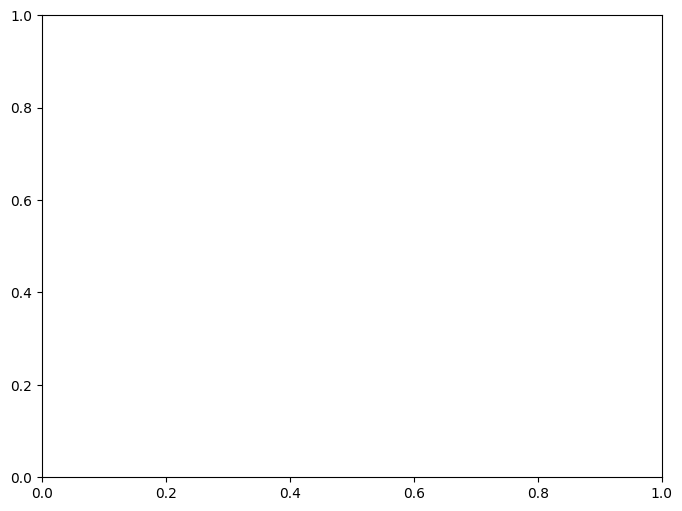

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# y_test: true returns
# y_pred: predicted returns (regressor)
# probs: probability of positive return (from classifier)

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    y_test, y_pred, c=probs, cmap='viridis', alpha=0.75, edgecolor='k', s=60
)
plt.xlabel('Actual 5-Day Return')
plt.ylabel('Predicted 5-Day Return')
plt.title('Predicted vs. Actual Returns (Colored by Positive Return Confidence)')

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', label='Perfect Prediction (y=x)')
plt.axhline(0, color='grey', lw=1, ls=':')
plt.axvline(0, color='grey', lw=1, ls=':')

cbar = plt.colorbar(sc)
cbar.set_label('P(Return > 0)')
plt.legend()
plt.grid(True, ls=':')
plt.tight_layout()
plt.show()


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, precision_score

# Define your forward windows and features:
forward_windows = [1,2,3,4,5,6,10,15,20,35,60,90,130,180,245]
target_cols = [f"r_p{n}_td" for n in forward_windows]
# Set your features (from previous steps)
all_features = all_features  # your feature list, e.g. returns + insider features

for target_col in target_cols:
    print(f"\n=== Results for: {target_col} ===")
    # Drop NAs for this window
    df_sub = df.dropna(subset=[target_col] + all_features)
    if df_sub.shape[0] < 50:
        print("Too few samples, skipping.")
        continue
    X = df_sub[all_features]
    y = df_sub[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    # For precision: classify as win if predicted > 0, compare to true
    y_pred_class = (y_pred > 0).astype(int)
    y_true_class = (y_test > 0).astype(int)
    precision = precision_score(y_true_class, y_pred_class, zero_division=0)

    print(f"  R²:        {r2:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Test samples: {len(y_test)}")



=== Results for: r_p1_td ===
  R²:        0.4088
  Precision: 0.6452
  Test samples: 109

=== Results for: r_p2_td ===
  R²:        0.3247
  Precision: 0.7000
  Test samples: 109

=== Results for: r_p3_td ===
  R²:        0.2894
  Precision: 0.7586
  Test samples: 109

=== Results for: r_p4_td ===
  R²:        0.4025
  Precision: 0.5909
  Test samples: 109

=== Results for: r_p5_td ===
  R²:        0.3397
  Precision: 0.5862
  Test samples: 109

=== Results for: r_p6_td ===
  R²:        0.3818
  Precision: 0.6667
  Test samples: 109

=== Results for: r_p10_td ===
  R²:        0.4100
  Precision: 0.6250
  Test samples: 109

=== Results for: r_p15_td ===
  R²:        0.4437
  Precision: 0.6452
  Test samples: 109

=== Results for: r_p20_td ===
  R²:        0.3645
  Precision: 0.5806
  Test samples: 109

=== Results for: r_p35_td ===
  R²:        0.5427
  Precision: 0.7733
  Test samples: 109

=== Results for: r_p60_td ===
  R²:        0.4139
  Precision: 0.7778
  Test samples: 109

=== 